### Business Problem Understanding 

Credit card fraud represents a significant threat to the integrity of financial transactions. As the reliance on credit cards for everyday purchases continues to grow, so does the sophistication of fraudsters exploiting vulnerabilities in the system. This project aims to analyze patterns of credit card fraud, understand the factors contributing to fraudulent activities, and explore effective methods for detection and prevention.

### Data Understanding

* The dataset comprises 100,000 transactions displaying real-world credit card activity.

**Independent Variables-**

* TransactionID: A unique identifier for each transaction, ensuring traceability.
* TransactionDate: The date and time when the transaction occurred, allowing for temporal analysis.
* Amount: The monetary value of the transaction, which can help identify unusually large transactions that may indicate fraud.
* MerchantID: An identifier for the merchant involved in the transaction, useful for assessing merchant-related fraud patterns.
* TransactionType: Indicates whether the transaction was a purchase or a refund, providing context for the activity.
* Location: The geographic location of the transaction, facilitating analysis of fraud trends by region.


**Dependent Variables-**

* IsFraud: A binary target variable indicating whether the transaction is fraudulent (1) or legitimate (0), essential for supervised learning models.

### Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings                    
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("credit_card_fraud_dataset.csv")
df.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [4]:
df.columns.tolist()

['TransactionID',
 'TransactionDate',
 'Amount',
 'MerchantID',
 'TransactionType',
 'Location',
 'IsFraud']

In [5]:
df.isnull().sum()

TransactionID      0
TransactionDate    0
Amount             0
MerchantID         0
TransactionType    0
Location           0
IsFraud            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
len(df['TransactionID'])

100000

In [8]:
len(df['TransactionDate'])

100000

In [9]:
# Drop TransactionDate and TransactionID variables

In [10]:
df['Amount'].nunique()

90621

In [11]:
df['MerchantID'].nunique()

1000

In [12]:
df['MerchantID'].value_counts()

MerchantID
461    149
188    134
192    129
517    128
820    126
      ... 
119     75
936     74
968     73
635     71
512     69
Name: count, Length: 1000, dtype: int64

In [13]:
# There are 1000 Unique Merchants

In [14]:
df['TransactionType'].value_counts()

TransactionType
refund      50131
purchase    49869
Name: count, dtype: int64

In [15]:
df['Location'].value_counts()

Location
Chicago         10193
San Diego       10111
Dallas          10076
San Antonio     10062
New York         9993
Houston          9991
Phoenix          9960
Los Angeles      9936
Philadelphia     9873
San Jose         9805
Name: count, dtype: int64

In [16]:
df['IsFraud'].value_counts()

IsFraud
0    99000
1     1000
Name: count, dtype: int64

In [17]:
# Undersampling of Dataset will be required

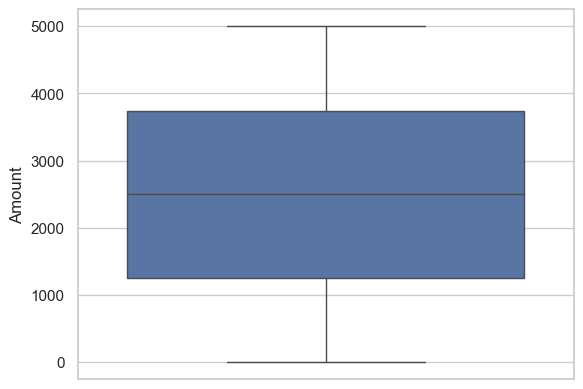

In [18]:
sns.boxplot(df['Amount'])
plt.show()

* No Outlier value present 

In [19]:
continuous = ['Amount', 'MerchantID',]

categorical = ['TransactionType', 'Location']

In [20]:
df[continuous].describe()

,Amount,MerchantID
count,100000.000000,100000.000000
mean,2497.092666,501.676070
std,1442.415999,288.715868
min,1.050000,1.000000
25%,1247.955000,252.000000
50%,2496.500000,503.000000
75%,3743.592500,753.000000
max,4999.770000,1000.000000


In [21]:
df[categorical].describe()

,TransactionType,Location
count,100000,100000
unique,2,10
top,refund,Chicago
freq,50131,10193


In [22]:
df['Amount'].skew()

0.001643312258608711

### Data Cleaning-

In [23]:
df.drop(columns=['TransactionID','TransactionDate'] , axis=1, inplace=True)
df

,Amount,MerchantID,TransactionType,Location,IsFraud
0,4189.27,688,refund,San Antonio,0
1,2659.71,109,refund,Dallas,0
2,784.00,394,purchase,New York,0
3,3514.40,944,purchase,Philadelphia,0
4,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...
99995,1057.29,289,refund,San Antonio,0
99996,297.25,745,refund,San Antonio,0
99997,3448.56,690,purchase,San Antonio,0
99998,3750.79,644,purchase,Philadelphia,0


**Encoding**

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df["TransactionType"])
df['Location'] = le.fit_transform(df["Location"])

df

,Amount,MerchantID,TransactionType,Location,IsFraud
0,4189.27,688,1,7,0
1,2659.71,109,1,1,0
2,784.00,394,0,4,0
3,3514.40,944,0,5,0
4,369.07,475,0,6,0
...,...,...,...,...,...
99995,1057.29,289,1,7,0
99996,297.25,745,1,7,0
99997,3448.56,690,0,7,0
99998,3750.79,644,0,5,0


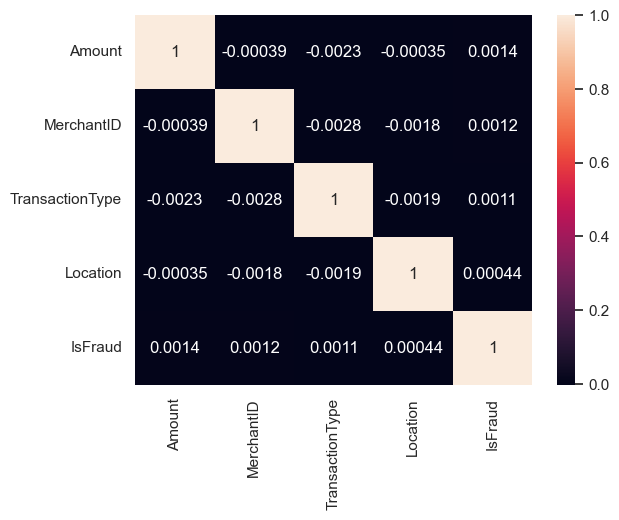

In [25]:
sns.heatmap( df.corr(), annot=True )
plt.show()

In [26]:
print( 'Max Amount Value: ' , df['Amount'].max())
print( 'Min Amount Value: ' , df['Amount'].min())

Max Amount Value:  4999.77
Min Amount Value:  1.05


In [27]:
print( 'Max MerchantID Value: ' , df['MerchantID'].max())
print( 'Min MerchantID Value: ' , df['MerchantID'].min())

Max MerchantID Value:  1000
Min MerchantID Value:  1


In [28]:
# Scaling or Discretization on Amount and MerchantID??

**Discretization**

In [29]:
#Creating Bins

intervals= [0, 1000, 2000, 3000, 4000, 5000 ]
categories= [1,2,3,4,5]

#apply discretization using intervals
df['Amount_Category']= pd.cut(df['Amount'], bins=intervals, labels=categories )

df.head()

,Amount,MerchantID,TransactionType,Location,IsFraud,Amount_Category
0,4189.27,688,1,7,0,5
1,2659.71,109,1,1,0,3
2,784.00,394,0,4,0,1
3,3514.40,944,0,5,0,4
4,369.07,475,0,6,0,1


In [30]:
#Creating Bins

intervals= [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1001 ]
categories= [1,2,3,4,5,6,7,8,9,10]

#apply discretization using intervals
df['MerchantID_Category']= pd.cut(df['MerchantID'], bins=intervals, labels=categories )

df.head()

,Amount,MerchantID,TransactionType,Location,IsFraud,Amount_Category,MerchantID_Category
0,4189.27,688,1,7,0,5,7
1,2659.71,109,1,1,0,3,2
2,784.00,394,0,4,0,1,4
3,3514.40,944,0,5,0,4,10
4,369.07,475,0,6,0,1,5


In [31]:
df.drop(columns=['Amount','MerchantID'] , axis=1, inplace=True)
df

,TransactionType,Location,IsFraud,Amount_Category,MerchantID_Category
0,1,7,0,5,7
1,1,1,0,3,2
2,0,4,0,1,4
3,0,5,0,4,10
4,0,6,0,1,5
...,...,...,...,...,...
99995,1,7,0,2,3
99996,1,7,0,1,8
99997,0,7,0,4,7
99998,0,5,0,4,7


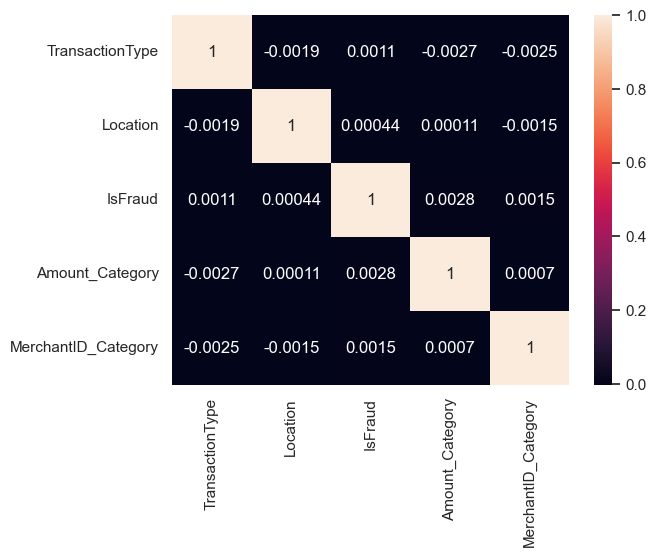

In [32]:
sns.heatmap( df.corr(), annot=True )
plt.show()

In [33]:
# Even though there's low correlation between variables, all variables are necessary as of now to conduct further analysis.
# We may remove unnecessary variables in future. 

In [34]:
#Undersampling of Dataset will be required

In [36]:
df.to_excel('Credit Card Fraud Detection (Cleaned Data).xlsx' , index=False)